In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
abalone=pd.read_csv(r"C:\Users\hegde\Downloads\abalone.csv")

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [6]:
X=abalone.drop(['Sex'],axis=1)
y=abalone['Sex']

print(list(X.columns.values))

X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
(3341, 8)
(836, 8)
(3341,)
(836,)


In [7]:
model=LogisticRegression(random_state=0,multi_class='multinomial',penalty=None,solver='newton-cg').fit(X_train,y_train)
preds=model.predict(X_test)

params=model.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': None, 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [8]:
#print model parameters
print('Intercept: \n',model.intercept_)
print('Coefficients: \n',model.coef_)

Intercept: 
 [-1.78722136  1.04125722  0.74596414]
Coefficients: 
 [[-6.1458923   6.60723393  3.92928106  1.87256063 -2.66889263  5.98940549
  -1.50629263  0.06142566]
 [12.17937143 -6.83031144 -5.45082401 -4.22195633  2.79756071 -8.49328028
   3.09531813 -0.12236135]
 [-6.03347913  0.22307751  1.52154295  2.34939571 -0.12866808  2.50387479
  -1.5890255   0.06093569]]


In [9]:
#calculate odds ratio estimates
np.exp(model.coef_)

array([[2.14226350e-03, 7.40432100e+02, 5.08703917e+01, 6.50493179e+00,
        6.93289559e-02, 3.99177225e+02, 2.21730493e-01, 1.06335145e+00],
       [1.94730423e+05, 1.08052155e-03, 4.29276594e-03, 1.46699171e-02,
        1.64045824e+01, 2.04840224e-04, 2.20942662e+01, 8.84828574e-01],
       [2.39713948e-03, 1.24991745e+00, 4.57928537e+00, 1.04792353e+01,
        8.79265761e-01, 1.22297901e+01, 2.04124435e-01, 1.06283056e+00]])

In [10]:
#use statsmodel to access variables
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: 0.850662
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                    Sex   No. Observations:                 3341
Model:                        MNLogit   Df Residuals:                     3323
Method:                           MLE   Df Model:                           16
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                  0.2239
Time:                        12:35:58   Log-Likelihood:                -2842.1
converged:                       True   LL-Null:                       -3662.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
         Sex=I       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.8285      0.569      4.968      0.000       1.713       3.944
Length           

In [11]:
#create a confusion matrix y_test as first arguement and the pred second arguement
confusion_matrix(y_test,preds)


confmtrx=np.array(confusion_matrix(y_test,preds))

pd.DataFrame(confmtrx,index=['Female','Infant','Male'],
            columns=['predicted_Female','predicted_Infant','predicted_Male'])

,predicted_Female,predicted_Infant,predicted_Male
Female,88,44,138
Infant,15,210,35
Male,79,66,161


In [12]:
#accuracy statistics
print('Accuracy Score: ',metrics.accuracy_score(y_test,preds))

#create classificastion\
class_report=classification_report(y_test,preds)
print(class_report)

Accuracy Score:  0.5490430622009569
              precision    recall  f1-score   support

           F       0.48      0.33      0.39       270
           I       0.66      0.81      0.72       260
           M       0.48      0.53      0.50       306

    accuracy                           0.55       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.55      0.54       836



In [13]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [16]:
print(list(X.columns.values))

X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.20,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
(3341, 8)
(836, 8)
(3341,)
(836,)


In [17]:
X = iris.drop('species', axis=1)
y = iris['species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model1 = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
predictions = model1.predict(X_test)

params=model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [21]:
print('Intercept: \n',model1.intercept_)
print('Coefficients: \n',model1.coef_)

Intercept: 
 [  9.0320304   1.8407217 -10.8727521]
Coefficients: 
 [[-0.39704054  0.96067569 -2.37415262 -1.00301553]
 [ 0.51252767 -0.25277734 -0.21506448 -0.76948326]
 [-0.11548712 -0.70789835  2.5892171   1.77249879]]


In [22]:
np.exp(model1.coef_)

array([[ 0.67230677,  2.61346177,  0.09309334,  0.36677176],
       [ 1.66950582,  0.77664079,  0.80648944,  0.46325239],
       [ 0.89093204,  0.49267855, 13.31933976,  5.88554175]])

In [23]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

Optimization terminated successfully.
         Current function value: nan
         Iterations 19
                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  120
Model:                        MNLogit   Df Residuals:                      110
Method:                           MLE   Df Model:                            8
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                     nan
Time:                        12:35:59   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -131.81
Covariance Type:            nonrobust   LLR p-value:                       nan
species=versicolor       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                     nan        nan        nan        nan         nan         nan
sepal_len

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2300: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


In [24]:
#accuracy statistics
print('Accuracy Score: ',metrics.accuracy_score(y_test,predictions))

#create classificastion\
class_report=classification_report(y_test,predictions)
print(class_report)

Accuracy Score:  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# ordinal logistic regression

In [25]:
diamond=pd.read_csv(r"C:\Users\hegde\Downloads\diamonds.csv")
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [27]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [28]:
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [29]:
from pandas.api.types import CategoricalDtype
cat_type=CategoricalDtype(categories=['Fair','Good','Ideal','Very Good','Premium'],ordered=True)

diamond['cut']=diamond['cut'].astype(cat_type)

diamond['cut'].dtype

CategoricalDtype(categories=['Fair', 'Good', 'Ideal', 'Very Good', 'Premium'], ordered=True)

In [30]:
#now in the data,we have variables x,y and z that represent the width,hiegt and length of the diamond
#by multiplying them we can calclulate the volume of the diamonds 

diamond['volume']=diamond['x']*diamond['y']*diamond['z']
diamond.drop(['x','y','z'],axis=1,inplace=True)

Text(0.5, 1.0, 'Distribution by Volume')

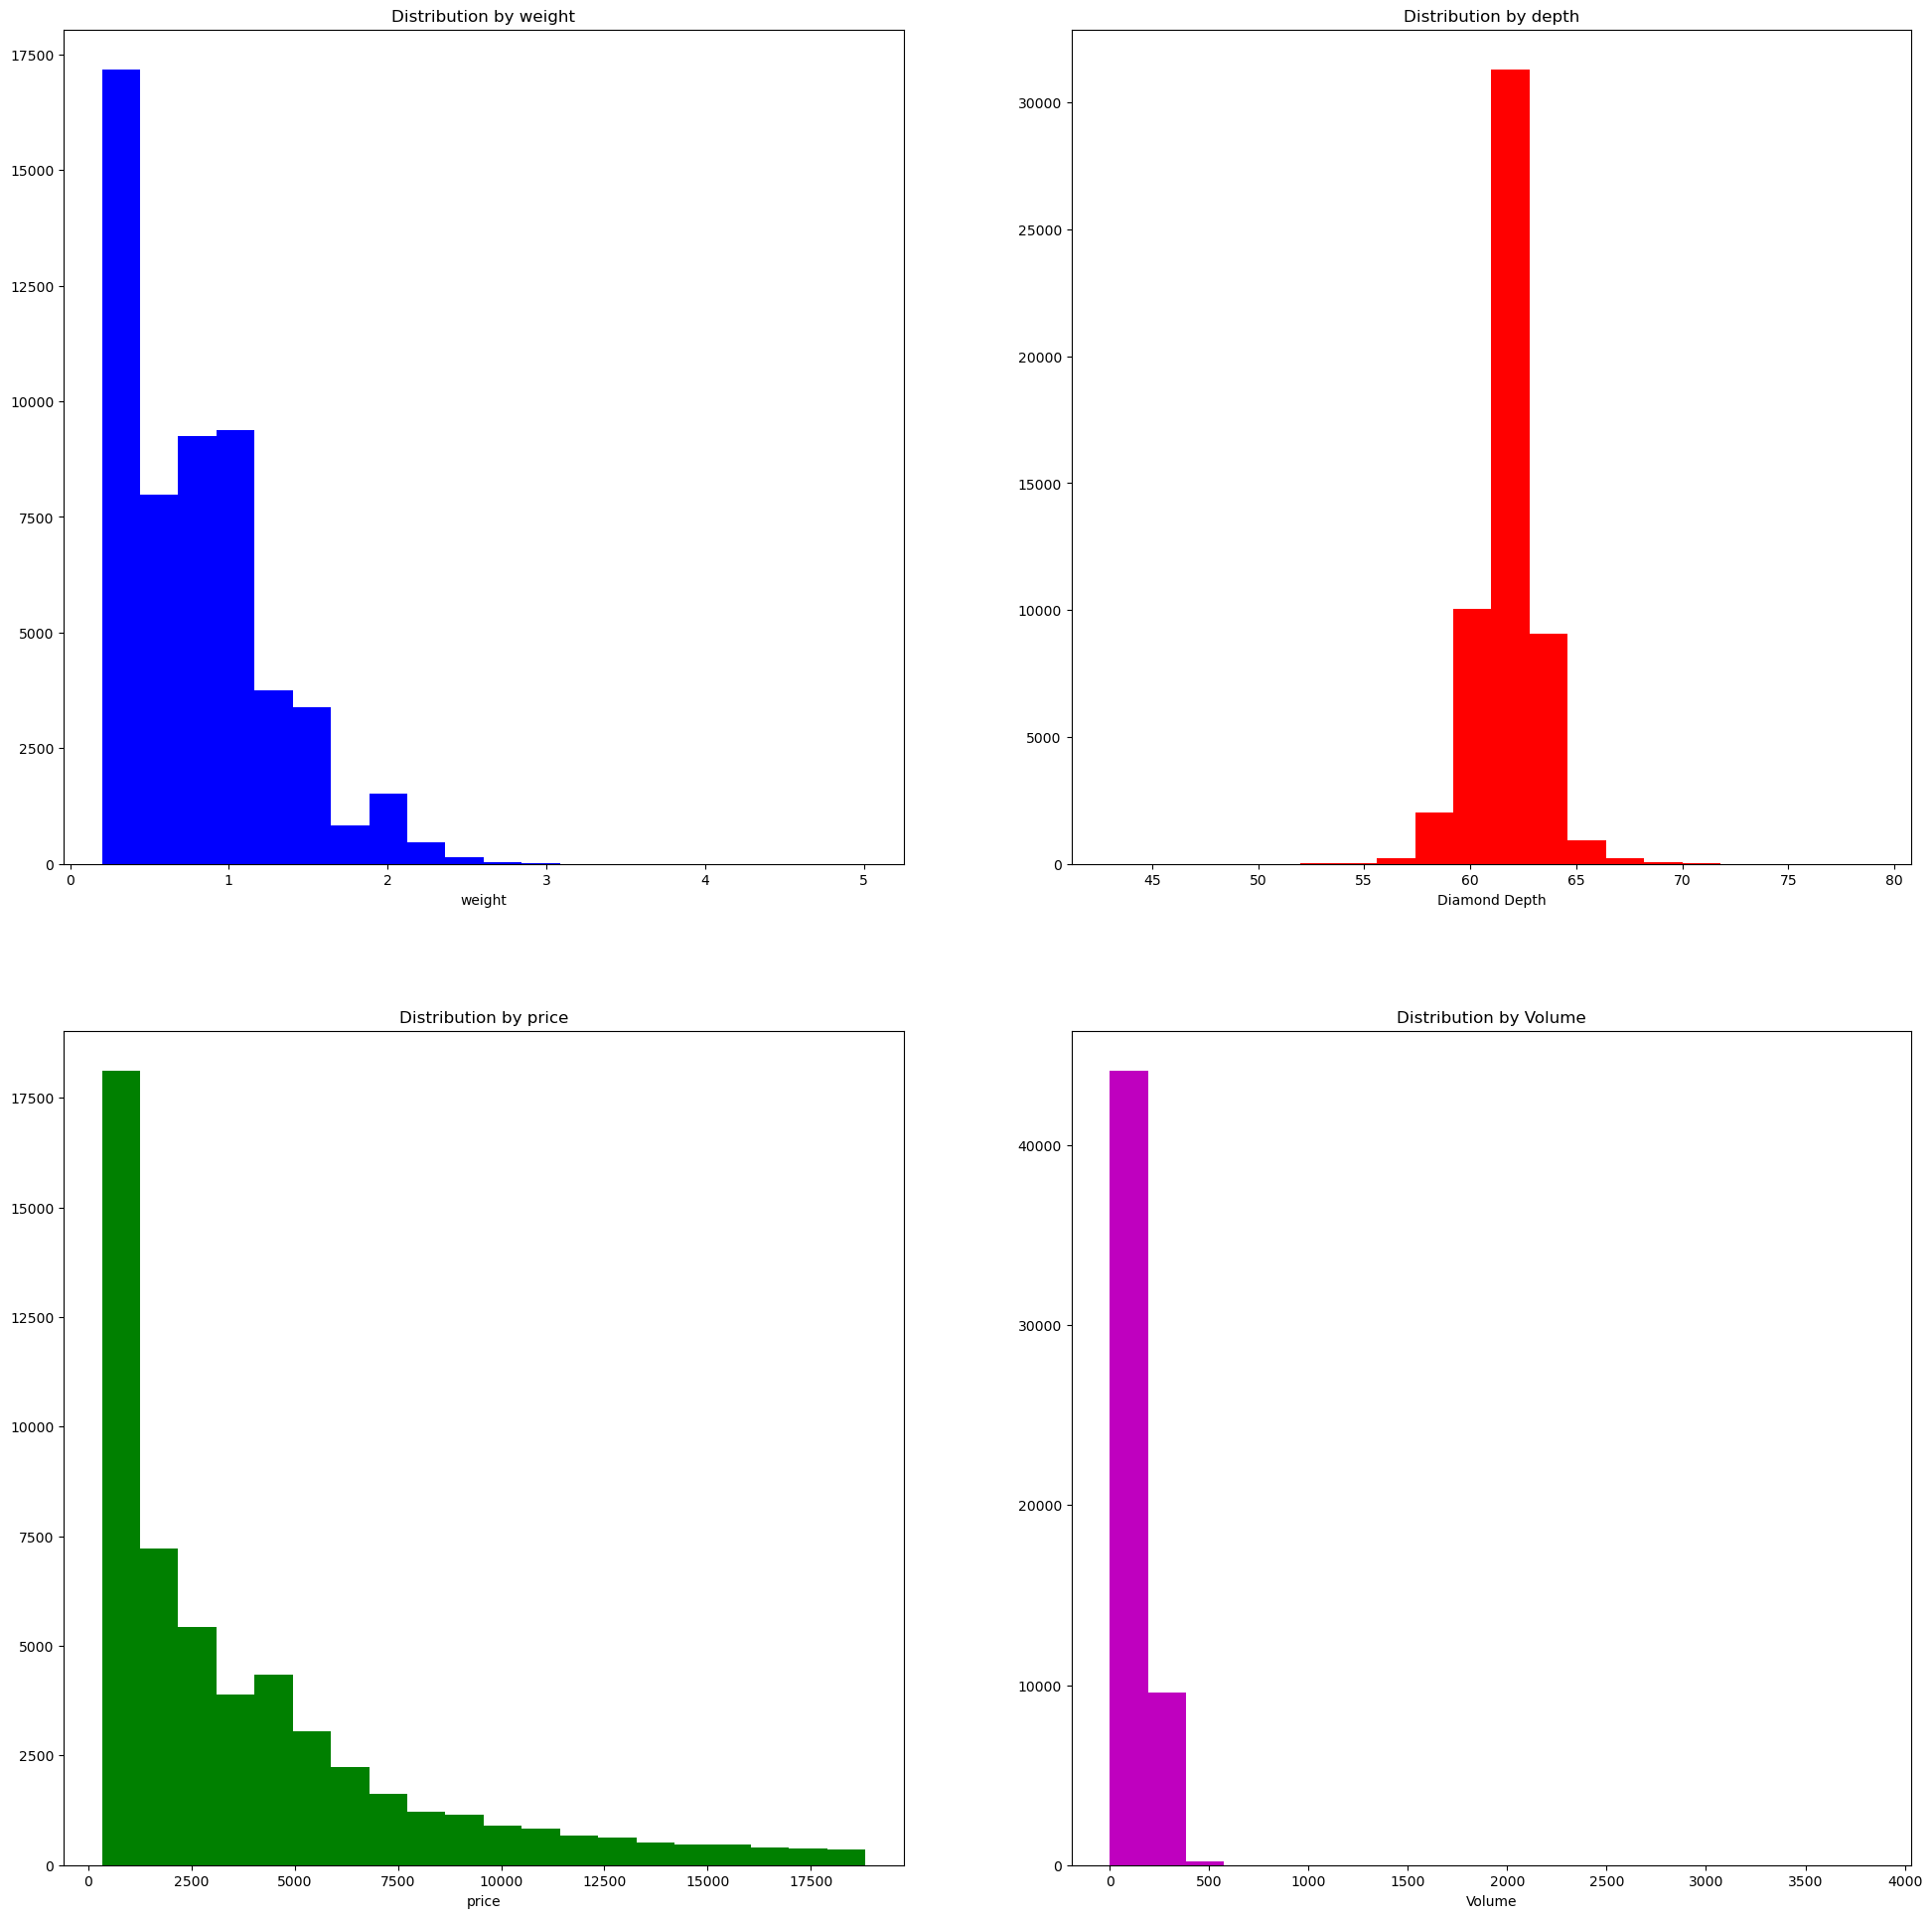

In [31]:
#here we have multiplied  the colums ,x,y


plt.figure(figsize=[24,24])

plt.subplot(221)
plt.hist(diamond['carat'],bins=20,color='b')
plt.xlabel('weight')
plt.title('Distribution by weight')

plt.subplot(222)
plt.hist(diamond['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by depth')

plt.subplot(223)
plt.hist(diamond['price'],bins=20,color='g')
plt.xlabel('price')
plt.title('Distribution by price')

plt.subplot(224)
plt.hist(diamond['volume'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

In [32]:
#ordered probit model

from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob=OrderedModel(diamond['cut'],
                     diamond[['volume','price','carat']],
                     distr='probit')

In [33]:

res_prob=mod_prob.fit(method='bfgs')
res_prob.summary

Optimization terminated successfully.
         Current function value: 1.369122
         Iterations: 29
         Function evaluations: 35
         Gradient evaluations: 35


<bound method GenericLikelihoodModelResults.summary of <statsmodels.miscmodels.ordinal_model.OrderedResults object at 0x000001B8621B4C10>>

In [34]:
mod_prob=OrderedModel(diamond['cut'],
                     diamond[['volume','price','carat']],
                     distr='logit')
res_log=mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.369215
         Iterations: 36
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    cut   Log-Likelihood:                -73855.
Model:                   OrderedModel   AIC:                         1.477e+05
Method:            Maximum Likelihood   BIC:                         1.478e+05
Date:                Thu, 26 Oct 2023                                         
Time:                        12:36:24                                         
No. Observations:               53940                                         
Df Residuals:                   53933                                         
Df Model:                           7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume                0.0104      0.002      5.875      0.000       0.007       0.014
price              2.348e-05   5.31e-06      4.425      0.000    1.31e-05    3.39e-05
carat                -1.5407      0.286     -5.394      0.000      -2.100      -0.981
Fair/Good            -3.2836      0.031   -105.758      0.000      -3.344      -3.223
Good/Ideal            0.4038      0.015     27.062      0.000       0.375       0.433
Ideal/Very Good       0.7301      0.006    116.508      0.000       0.718       0.742
Very Good/Premium    -0.0055      0.008     -0.653      0.514      -0.022       0.011
=====================================================================================
"""

In [35]:
predicted=res_log.model.predict(res_log.params,exog=diamond[['volume','price','carat']])
predicted

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


array([[0.03443606, 0.10308231, 0.42201809, 0.21495304, 0.2255105 ],
       [0.03468862, 0.10372996, 0.42298246, 0.21440769, 0.22419127],
       [0.03447851, 0.10319128, 0.42218114, 0.21486137, 0.2252877 ],
       ...,
       [0.03052062, 0.09285935, 0.40522189, 0.22335735, 0.2480408 ],
       [0.02973833, 0.0907751 , 0.40141256, 0.22500614, 0.25306787],
       [0.02970169, 0.09067712, 0.4012301 , 0.22508295, 0.25330815]])